# CS 536 : Perceptrons

##### Submitted by Nitin Reddy Karolla

### 1) Show that there is a perceptron that correctly classifies this data. Is this perceptron unique? What is the ‘best’ perceptron for this data set, theoretically?

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def data_generator(data_size, feature_count, parameter_e = 0.1):
    X = {}
    for i in range(1,feature_count):
        X['X'+ str(i)] = np.random.normal(loc = 0, scale = 1, size = data_size)
    df = pd.DataFrame(data = X)
    
    last_feature_dist = np.random.exponential(scale = 1, size = data_size)

    X_last = []
    Y = []
    for i in last_feature_dist:
        p = np.random.binomial(n = 1, p = 0.5, size = 1)
        if p ==0:
            X_last.append(i + parameter_e)
            Y.append(1)
        else:
            X_last.append(-1 * (i + parameter_e))
            Y.append(-1)

    df['X'+str(feature_count)] = X_last
    df['Y'] = Y
    return df

In [3]:
data = data_generator(100,2,parameter_e = 0.5)

Text(0.5,1,'Scatter plot of data')

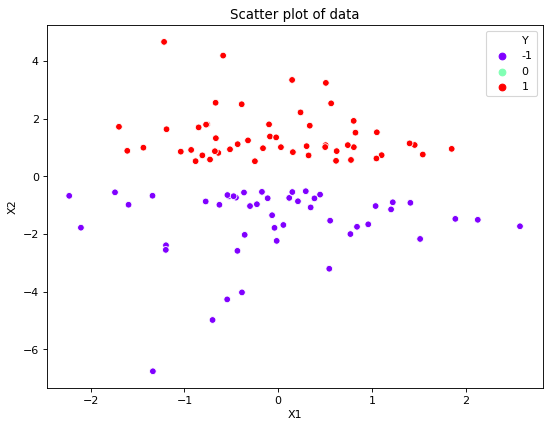

In [4]:
plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
sns.scatterplot(data['X1'], data['X2'], hue= data['Y'], palette= 'rainbow')
plt.title("Scatter plot of data")

As we can see in the data above, the data is clearly linearaly separable and only depends on the k th feature (i.e. X2 here)

The data has k features. The first k-1 features follow a standard normal distribution and they kind of act as noise in the data. Where as the output of Y is only dependant on kth feature which is an exponetial distribution. So a perceptron exist that classfies this data correctly theorectically can be achieved when the coefficents are multiplied by first k-1 features is 0 and multiplies the feature k with constant. 

The weight vector will be $  [0,0,0..... ,1] .$ This the theoretical hyperplace that separates the data.

However, this is unique hyperplane that would separate the data theorectically for all possible data generated.

Practically, there might be lot of hyperplanes possible based on the data the Perceptron Learning algorithms look at, which can be seen later in the notebook.

### 2) We want to consider the problem of learning perceptrons from data sets. Generate a set of data of size m = 100 with k = 20, $ \epsilon $ = 1.
– Implement the perceptron learning algorithm. This data is separable, so the algorithm will terminate.
How does the output perceptron compare to your theoretical answer in the previous problem?

In [5]:
class Perceptron_Learning_Algorithm():

    def __init__(self, weight_vector = None ,data = None, target = None, store_error = None, 
                 termination_steps = 1000 , all_weights = None ):
        self.weight_vector = weight_vector
        self.data = data
        self.target = target
        self.weight_update_counter = 0
        self.row_iterated_counter = 0
        self.while_loop_counter = 0
        self.store_error = store_error
        self.termination_steps = termination_steps
        self.all_weights = all_weights

    
    def _initialize_weights(self, dimension):
        self.weight_vector = np.zeros(shape = dimension)
        self.weight_term = np.zeros(shape = dimension)

    def _update_weights(self, weight_vector, x, y):
        self.weight_vector = weight_vector + y * x 
    
    def _intialize_data(self):
        df = self.data.copy()
        # Adding Bias with values 1 in front of data frame
        df.insert(loc=0, column='Bias', value=[1.0 for i in range(df.shape[0])])  
        # Extracting values to numpy array
        Y = df['Y'].values
        X = df.drop('Y', axis = 1).values
        return X,Y
        
    def fit(self, data, target):
        self.data = data
        self.target = target
        X,Y = self._intialize_data()

        if self.weight_vector == None :
            self._initialize_weights(X.shape[1])
            
        if self.store_error == None:
            self.store_error = [[],[]]
            
        if self.all_weights == None:
            self.all_weights = [[],[]]
            self.all_weights[0].append(0)
            self.all_weights[1].append(self.weight_vector)
        #### Fitting the data
        count = 0
        run = 0
        run_poc = 0
        while count <= len(X) :
            for i in range(len(X)):
                if np.dot(self.weight_vector, X[i]) * Y[i] <= 0 :
                    self._update_weights(self.weight_vector,  X[i], Y[i])
                    count = 0
                    self.weight_update_counter  = self.weight_update_counter + 1
                    self.store_error[0].append(self.weight_update_counter)
                    self.store_error[1].append(self.training_error())
                    self.all_weights[0].append(self.weight_update_counter)
                    self.all_weights[1].append(self.weight_vector)

                count = count + 1
                self.row_iterated_counter = self.row_iterated_counter + 1
            self.while_loop_counter = self.while_loop_counter + 1
            if self.weight_update_counter >= self.termination_steps:
                print("No Separator Found")
                break

    def predict(self, data):
        data.insert(loc=0, column='Bias', value=[1.0 for i in range(data.shape[0])])
        pred_y = [1 if np.dot(self.weight_vector, i) > 0 else -1 for i in data.values]
        return pred_y

    def predict_value(self, data):
        data.insert(loc=0, column='Bias', value=[1.0 for i in range(data.shape[0])])
        pred_y = [np.dot(self.weight_vector, i) for i in data.values]
        return pred_y

    def training_error(self):
        predicted_y = self.predict(self.data.drop('Y', axis = 1))
        return (1 -sum(self.data['Y'] == predicted_y)/ len(self.data))

In [6]:
data = data_generator(100,20,1)

In [7]:
model = Perceptron_Learning_Algorithm()

In [8]:
model.fit(data, 'Y')

In [9]:
print("The bias value in the model is ",  model.weight_vector[0])

The bias value in the model is  -2.0


Text(0,0.5,'Coefficient')

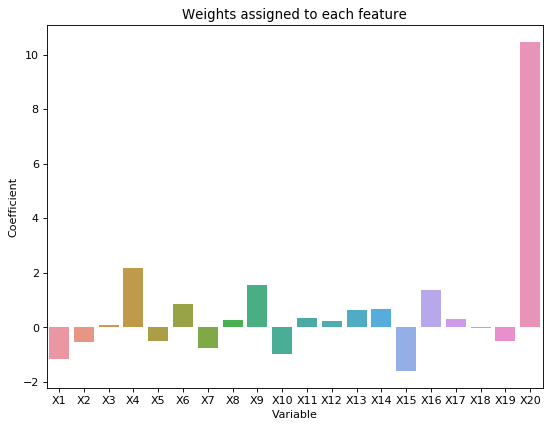

In [10]:
plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
sns.barplot(['X' + str(i) for i in range(1,21)], model.weight_vector[1:])
plt.title("Weights assigned to each feature")
plt.xlabel("Variable")
plt.ylabel("Coefficient")

Here, we see the coefficient of the last variable is significantly high. The coefficients of other data points is almost close to zero not zero as in case of theoretical case. 

### 3) For any given data set, there may be multiple separators with multiple margins - but for our data set, we can effectively control the size of the margin with the parameter $\epsilon $ - the bigger this value, the bigger the margin of our separator. 
#### – For m = 100, k = 20, generate a data set for a given value of $\epsilon $ and run the learning algorithm to completion. Plot, as a function of $\epsilon $ ∈ [0, 1], the average or typical number of steps the algorithm needs to terminate. Characterize the dependence.

In [11]:
steps = []
param_e = []
simulations = 100
m = 100
k = 20
for e in np.arange(0,1.001, 0.05):
    temp_step = []
    for i in range(simulations) :
        data = data_generator(data_size= m,feature_count= k, parameter_e= e)
        model = Perceptron_Learning_Algorithm()
        model.fit(data, 'Y')
        temp_step.append(model.weight_update_counter)
    temp = sum(temp_step)/len(temp_step)
    steps.append(temp)
    param_e.append(e)

Text(0.5,1,'Steps vs Parameter Epsilon')

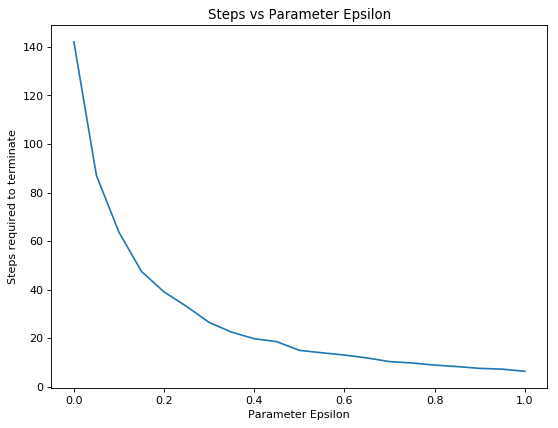

In [12]:
plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
sns.lineplot(param_e,steps)
plt.xlabel("Parameter Epsilon")
plt.ylabel("Steps required to terminate")
plt.title("Steps vs Parameter Epsilon")

As, we know that termination steps depends on the margin, we can clearly see that in the plot. As eplison is smaller, the alogrithm takes more steps to terminate, where as the the epsilon increases, the margin increases and the alogrithm terminates sooner.

### 4) One of the nice properties of the perceptron learning algorithm (and perceptrons generally) is that learning the weight vector w and bias value b is typically independent of the ambient dimension. To see this, consider the following experiment:
#### – Fixing m = 100, $ \epsilon $ = 1, consider generating a data set on k features and running the learning algorithm on it. Plot, as a function k (for k = 2, . . . , 40), the typical number of steps to learn a perceptron on a data set of this size. How does the number of steps vary with k? Repeat for m = 1000.


In [13]:
steps = []
param_e = 1
simulations = 100
m = 100
features = []
for k in range(2,41):
    temp_step = []
    for i in range(simulations) :
        data = data_generator(data_size= m,feature_count= k, parameter_e= param_e)
        model = Perceptron_Learning_Algorithm()
        model.fit(data, 'Y')
        temp_step.append(model.while_loop_counter)
    temp = sum(temp_step)/len(temp_step)
    steps.append(temp)
    features.append(k)

Text(0.5,1,'# Features vs Steps to terminate')

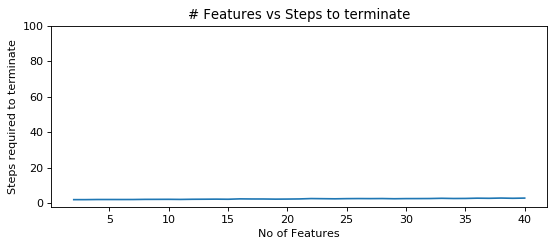

In [14]:
plt.figure(figsize=(8, 3), dpi= 80, facecolor='w', edgecolor='k')
sns.lineplot(features,steps)
plt.ylim(-2,100)
plt.xlabel("No of Features")
plt.ylabel("Steps required to terminate")
plt.title("# Features vs Steps to terminate")

In [15]:
steps_1000 = []
param_e = 1
simulations = 100
m = 1000
features_1000 = []
for k in range(2,41):
    temp_step = []
    for i in range(simulations) :
        data = data_generator(data_size= m,feature_count= k, parameter_e= param_e)
        model = Perceptron_Learning_Algorithm()
        model.fit(data, 'Y')
        temp_step.append(model.while_loop_counter)
    temp = sum(temp_step)/len(temp_step)
    steps_1000.append(temp)
    features_1000.append(k)

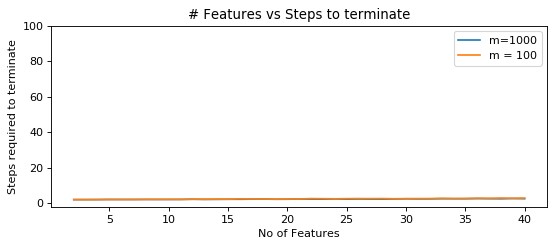

In [16]:
plt.figure(figsize=(8, 3), dpi= 80, facecolor='w', edgecolor='k')
sns.lineplot(features_1000,steps_1000)
plt.ylim(-2,100)
plt.xlabel("No of Features")
plt.ylabel("Steps required to terminate")
plt.title("# Features vs Steps to terminate")
sns.lineplot(features,steps)
plt.legend(["m=1000", "m = 100"])

As, we can see the number of steps required to terminate the algorithms is almost independant of sample size and number of features present in the data.

### 5) As shown in class, the perceptron learning algorithm always terminates in finite time - if there is a separator. Consider generating non-separable data in the following way: generate each X1, . . . , Xk as i.i.d. standard normals N(0, 1). Define Y by 



#### For data defined in this way, there is no universally applicable linear separator.

#### For k = 2, m = 100, generate a data set that is not linearly separable. (How can you verify this?) Then run the perceptron learning algorithm. What does the progression of weight vectors and bias values look like over time? If there is no separator, this will never terminate - is there any condition or heuristic you could use to determine whether or not to terminate the algorithm and declare no separator found?

In [17]:
def ns_data_generator(data_size, feature_count):
    X = {}
    for i in range(feature_count):
        X['X'+ str(i)] = np.random.normal(loc = 0, scale = 1, size = data_size)
    df = pd.DataFrame(data = X)
    Y = []
    for i in df.values:
        if sum([pow(j,2) for j in i]) >= feature_count:
            Y.append(1)
        else:
            Y.append(-1)
    
    df['Y'] = Y
    return df

In [18]:
data = ns_data_generator(100,2)

Text(0.5,1,'Scatter plot of data')

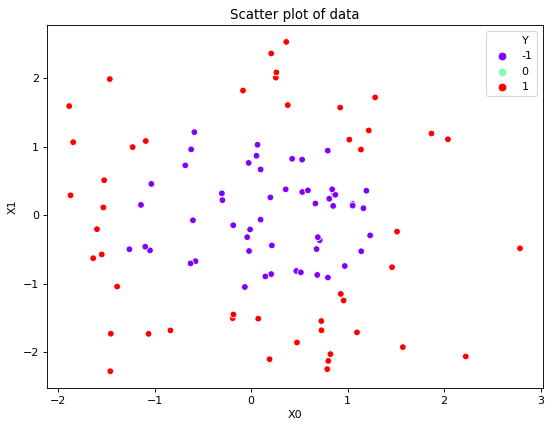

In [19]:
plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
sns.scatterplot(data['X0'], data['X1'], hue= data['Y'], palette= 'rainbow')
plt.title("Scatter plot of data")

As we can see above, when the data is generated for a 2 dimensional and plotted, it is not linearly separable. 

Let us look at perceptron learning algorithm as it progress through iterations and the error on the training data.

#### Error over time

In [20]:
data = data_generator(1000,20, 0.5)

In [21]:
p = Perceptron_Learning_Algorithm()

In [22]:
p.fit(data, 'Y')

Text(0.5,1,'Training Error over time in linearly separable data')

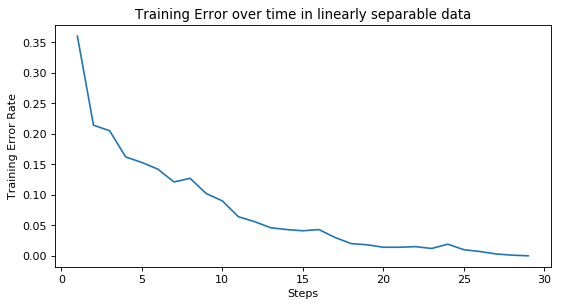

In [23]:
plt.figure(figsize=(8,4), dpi= 80, facecolor='w', edgecolor='k')
sns.lineplot(p.store_error[0], p.store_error[1])
plt.ylabel("Training Error Rate")
plt.xlabel("Steps")
plt.title("Training Error over time in linearly separable data")

We see a decreasing trend in the error and the error converges to zero after a point, the algorithm terminates. Let us try to look at the error in a non separable data, try to design a termination condition.

In [24]:
data = ns_data_generator(100,2)
p = Perceptron_Learning_Algorithm()
p.fit(data, 'Y')

No Separator Found


Text(0.5,1,'Training Error over time in linearly non separable data')

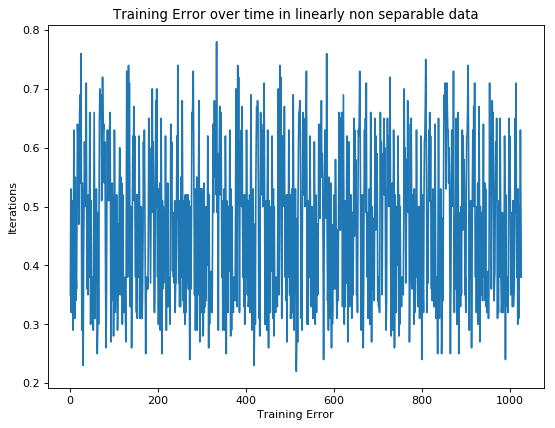

In [25]:
plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
sns.lineplot(p.store_error[0], p.store_error[1])
plt.xlabel("Training Error")
plt.ylabel("Iterations")
plt.title("Training Error over time in linearly non separable data")

In a non separable data, we see that the error does not decrease over time, it is very sporadic and no convergane is reached as expected.

#### Weights over time

In [26]:
data = data_generator(1000,2)
p = Perceptron_Learning_Algorithm()
p.fit(data, 'Y')

Text(0.5,1,'Coefficient over time in linearly separable data')

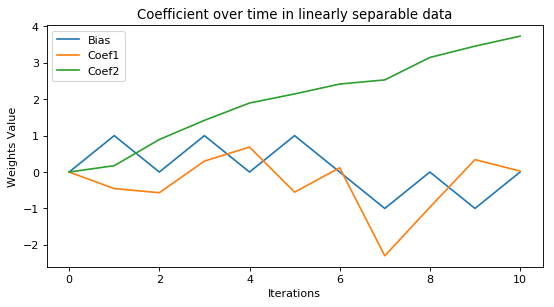

In [27]:
plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k')
sns.lineplot(p.all_weights[0], [i[0] for i in p.all_weights[1]] )
sns.lineplot(p.all_weights[0], [i[1] for i in p.all_weights[1]] )
sns.lineplot(p.all_weights[0], [i[2] for i in p.all_weights[1]] )
plt.legend(['Bias','Coef1','Coef2'])
plt.ylabel("Weights Value")
plt.xlabel("Iterations")
plt.title("Coefficient over time in linearly separable data")

Over time the other coeffients almost reach to zero as they have no role to play in separating the data, where as the weight of last variable is increasing over time until it can classify all the data points correctly.

In [28]:
data = ns_data_generator(100,2)
p = Perceptron_Learning_Algorithm()
p.fit(data, 'Y')

No Separator Found


Let us know look at the weight vector and bias against the time for the first 100 iterations for non separable data.

Text(0.5,1,'Coefficient over time in linearly non separable data')

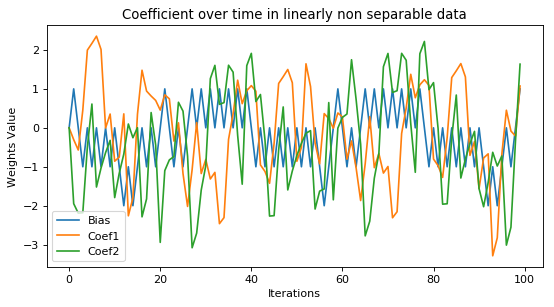

In [29]:
plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k')
sns.lineplot(p.all_weights[0][0:100], [i[0] for i in p.all_weights[1]][0:100] )
sns.lineplot(p.all_weights[0][0:100], [i[1] for i in p.all_weights[1]][0:100] )
sns.lineplot(p.all_weights[0][0:100], [i[2] for i in p.all_weights[1]][0:100] )
plt.legend(['Bias','Coef1','Coef2'])
plt.ylabel("Weights Value")
plt.xlabel("Iterations")
plt.title("Coefficient over time in linearly non separable data")

As, we see above, the error does not decrease with increase in iterations and is always random. We also know the termination steps in Perceptron learning algorithm are independent of dimension. So we can design a termination conditon that looks at error and if there is no improvement over few iterations we can terminate the algorithm.

So a condition of termiation steps is added into the algorithm, now the algorithm loops over the training data until either everything is correctly classifed for a pre-specified number of steps or the
maximum number of steps is exceeded.